# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;

  Да,имеет, потому что решающее дерево использует пороговые значения признаков для принятия решения, т.е. монотонные функции могут помочь лучше выделить пороговые значения.


* немонотонные функции от одного признака;

  Нет, не имеет, потому что решающее дерево может выделить неоптимальные пороговые значения, т.к. неспособно находить сложные немонотонные зависимости между признаками.

* линейные функции от нескольких признаков;

  Нет, не имеет, потому что решающее дерево и так способно выявлять линейные зависимости между признаками, поэтому использование линейных функций от нескольких признаков избыточно.

* нелинейные функции от нескольких признаков;

  Да, имеет, потому что нелинейные функции от нескольких признаков позволяют выявить более сложные зависимости между признаками.

* стандартизация признаков;

  Нет, не имеет, поскольку стандартизация признака подразумевает уменьшение всех значений, относящихся к нему в n раз, но тогда ведь и пороговое значение в дереве уменьшится в n раз.

* преобразования категориальных признаков.

  Да, имеет, наиболее оптимальным способом будет закодировать категориальные признаки с помощью OneHotEnconding или другой кодировки, потому что пороговые значения в решающем дереве - числа, соотвественно для работы с ним необходимо иметь только численные признаки.


---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

In [149]:
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

In [182]:
data = pd.read_csv('day.csv')
data = data.sample(frac=1).reset_index(drop=True)
train_data, other = train_test_split(data, train_size=0.60, random_state=42)
validate, test = train_test_split(other, train_size=0.5, random_state=42)

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [183]:
# функция, предназначенная для удаления выбросов
def remove_hue(target_df, feature):
    # IQR
    quartile_1 = np.percentile(target_df[feature], 25, interpolation='midpoint')
    quartile_2 = np.percentile(target_df[feature], 75, interpolation='midpoint')
    interquartile_range = quartile_2 - quartile_1

    # Выделение данных выше второго квантиля выборки
    upper = target_df[feature] >= (quartile_2 + 1.5 * interquartile_range)

    # Выделение данных ниже первого квантиля выборки
    lower = target_df[feature] <= (quartile_1 - 1.5 * interquartile_range)
    
    # Удаление выбросов (взятие данных между границами)
    target_df = target_df.loc[~(upper | lower)]

In [184]:
# убираем выбросы
train_data.reset_index(inplace=True)
train_data.drop('index', axis=1, inplace=True)

for feature in real_features:
  remove_hue(train_data, feature)

<ipython-input-183-640435f3e053>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  quartile_1 = np.percentile(target_df[feature], 25, interpolation='midpoint')
<ipython-input-183-640435f3e053>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  quartile_2 = np.percentile(target_df[feature], 75, interpolation='midpoint')


In [185]:
# кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(train_data[categorical_features])
train_cat = pd.DataFrame(encoder.transform(train_data[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# объединение закодированных категориальных признаков и вещественных признаков
X_train = pd.concat([train_data[real_features], train_cat], axis=1)
y_train = train_data['cnt']

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

In [186]:
# обучение решающего дерева глубины 3
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

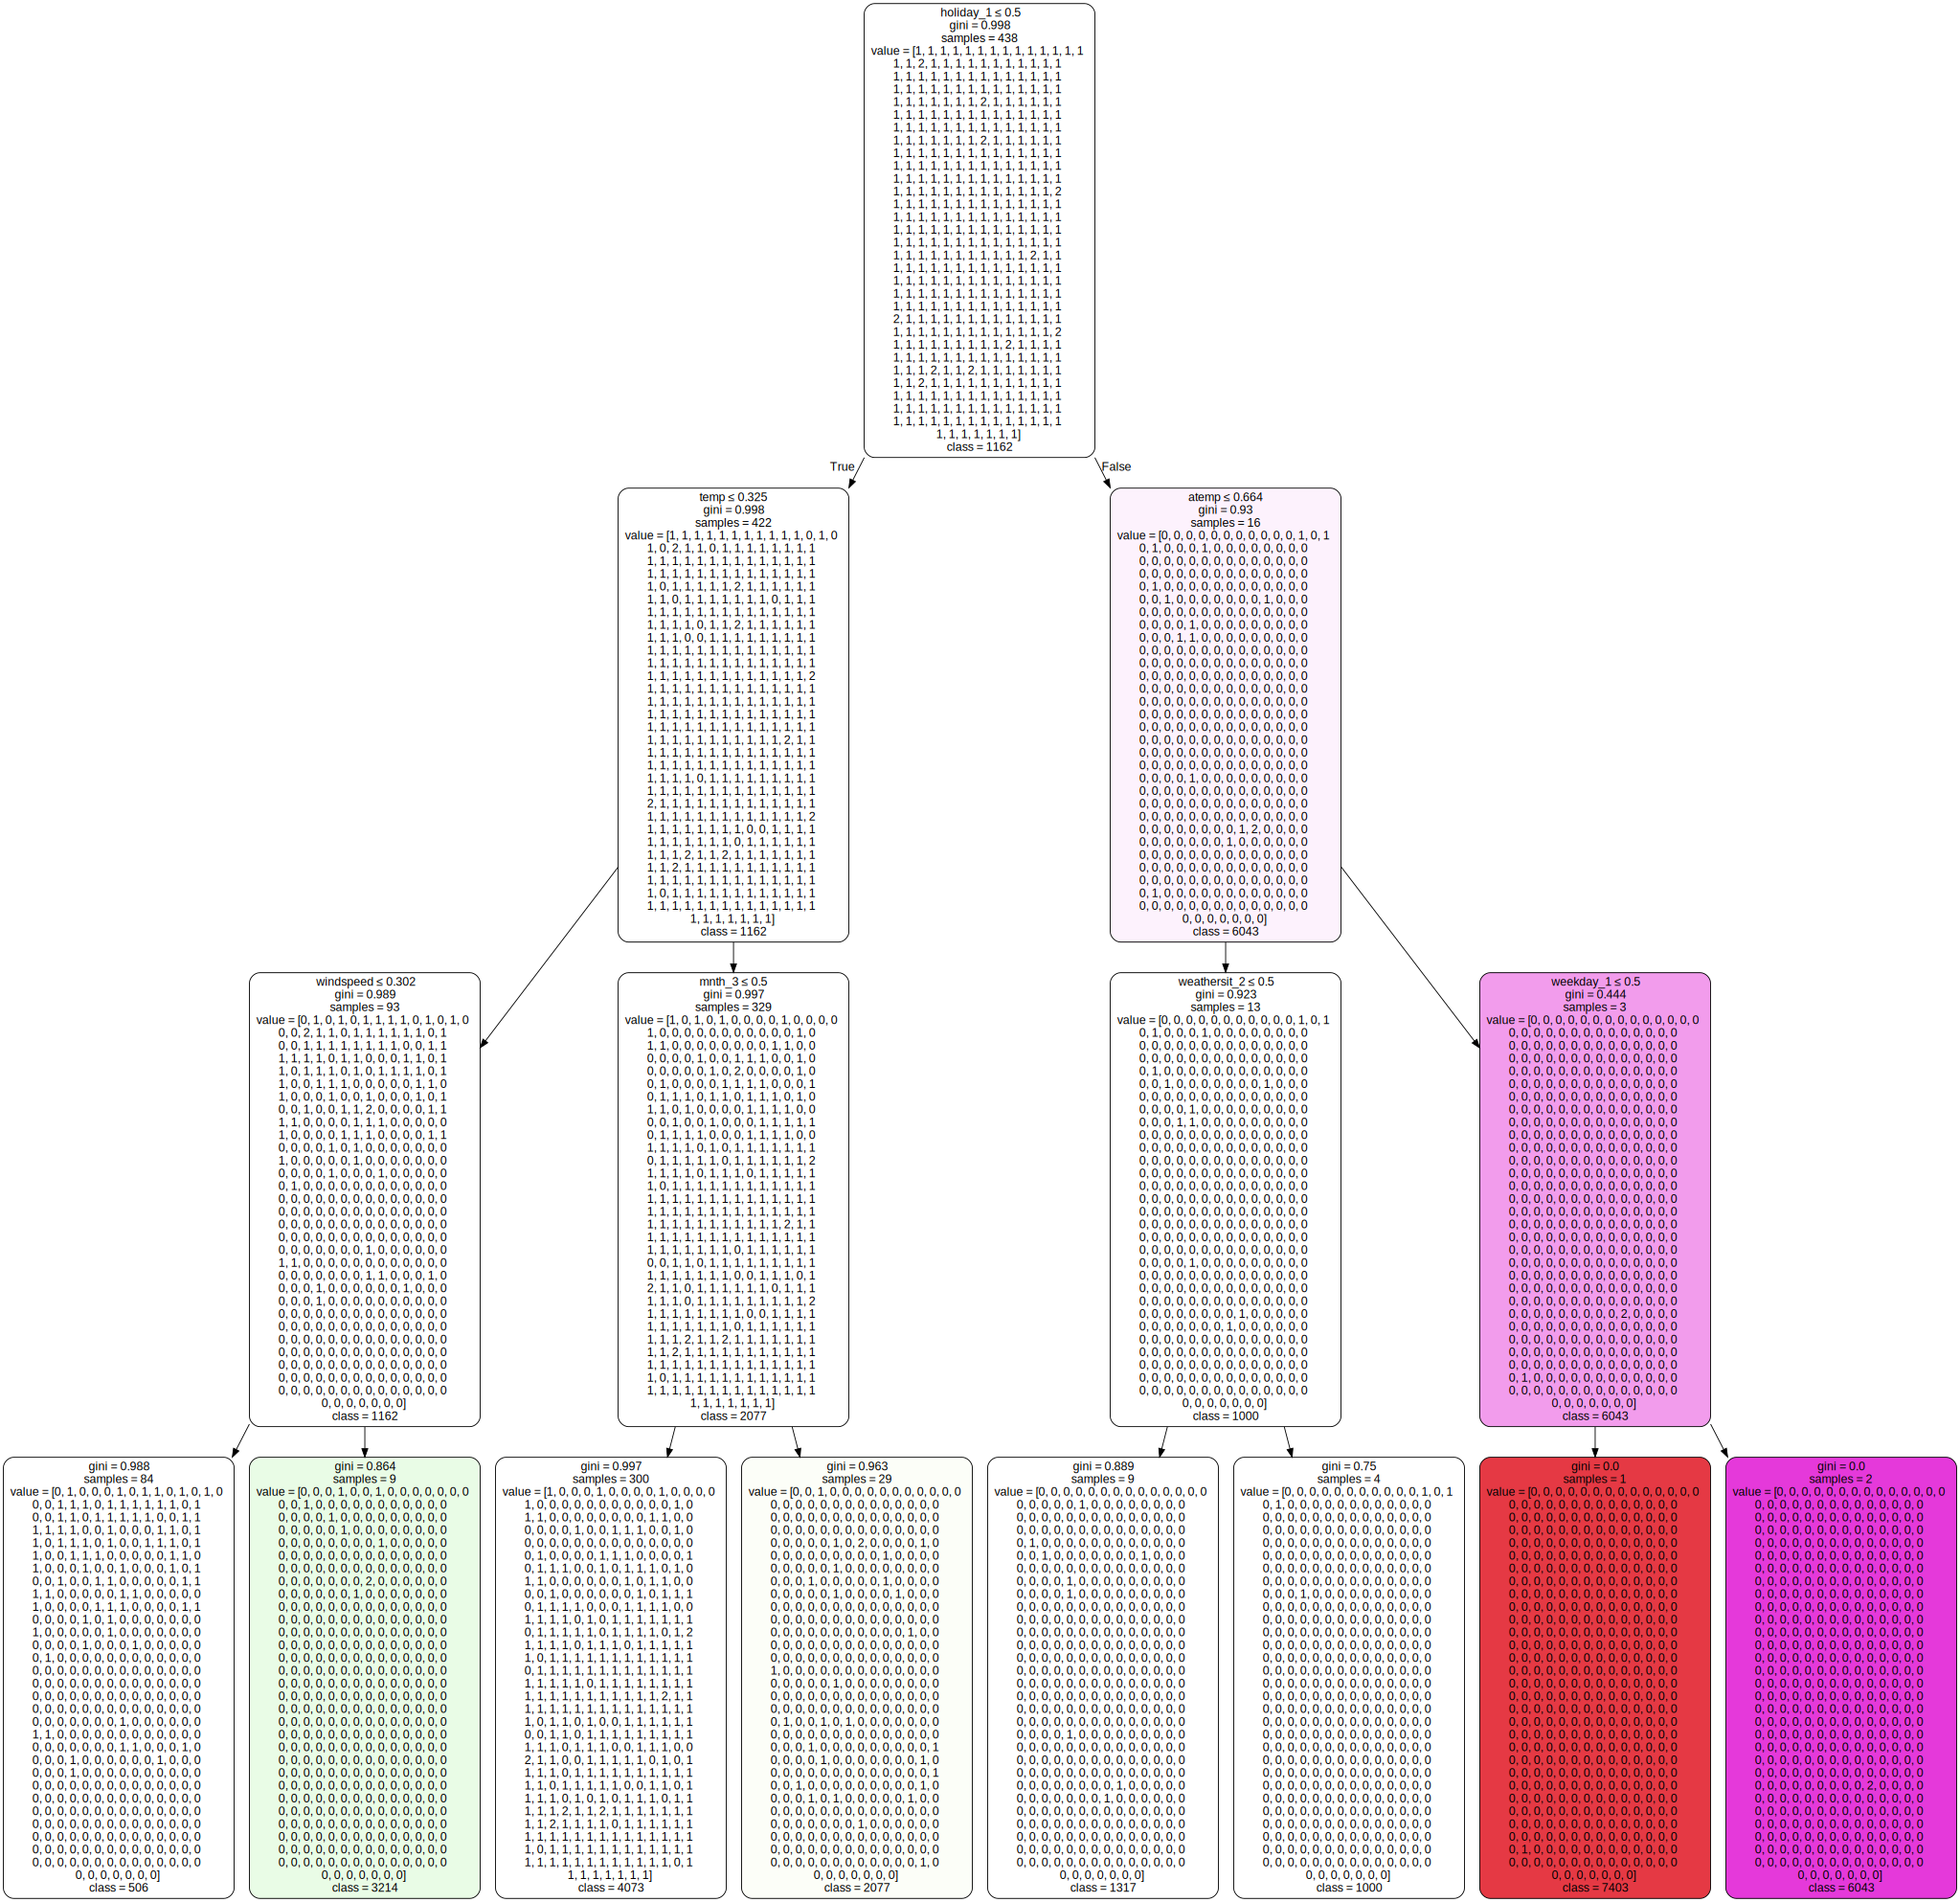

In [187]:
# визуализация обученного дерева
class_names = [str(c) for c in tree.classes_]
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=class_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [188]:
# закодируем валидационную выборку
validate_cat = pd.DataFrame(encoder.transform(validate[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# объединение закодированных категориальных признаков и вещественных признако
validate_real = validate[real_features].reset_index(drop=True)
X_valid = pd.concat([validate_real, validate_cat], axis=1)
y_valid = validate['cnt']

In [189]:
# подбор оптимального значения максимальной глубины дерева
min_error = 100.0
min_error_depth = 50

for i in range(1, 7):
  tree = DecisionTreeClassifier(max_depth=i, random_state=42)
  tree.fit(X_train, y_train)
  predictions = tree.predict(X_valid)
  err = mean_absolute_percentage_error(y_valid, predictions) * 100
  if min_error > err:
    min_error = err
    min_error_depth = i
print(f"Минимальная ошибка {min_error:0.3f}% достигается на глубине {min_error_depth:d}")

Минимальная ошибка 38.982% достигается на глубине 4


Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

In [190]:
# подбор минимального числа объектов в листе
min_error_leaf = 100.0
min_samples_split = 1

for i in range(50, 1, -1):
  tree = DecisionTreeClassifier(max_depth=min_error_depth, min_samples_split=i, random_state=42)
  tree.fit(X_train, y_train)
  predictions = tree.predict(X_valid)
  err = mean_absolute_percentage_error(y_valid, predictions) * 100
  if min_error_leaf > err:
    min_error_leaf = err
    min_samples_split = i
print(f"Минимальная ошибка {min_error_leaf:0.3f}% достигается при {min_samples_split:d} объектах в листе")

Минимальная ошибка 38.775% достигается при 50 объектах в листе


Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

In [191]:
# закодируем тестовую выборку
test_cat = pd.DataFrame(encoder.transform(test[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# объединение закодированных категориальных признаков и вещественных признако
test_real = test[real_features].reset_index(drop=True)
X_test = pd.concat([test_real, test_cat], axis=1)
y_test = test['cnt']

In [192]:
# инициализируем дерево при оптимальных гиперпараметрах
camera_regressor = DecisionTreeRegressor(
    criterion='absolute_error', max_depth=min_error_depth, min_samples_split=min_samples_split
)

In [193]:
def get_graphviz_graph(decision_tree_regressor):
    '''
    Функция для обучения решающего дерева и построения
    по нему графа graphviz для визуализации
    '''
    
    decision_tree_regressor.fit(X_test, y_test)
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None, 
        feature_names=X_test.columns, class_names='cnt',  
        filled=True, rounded=True, special_characters=True
    )  
    return graphviz.Source(dot_data)  

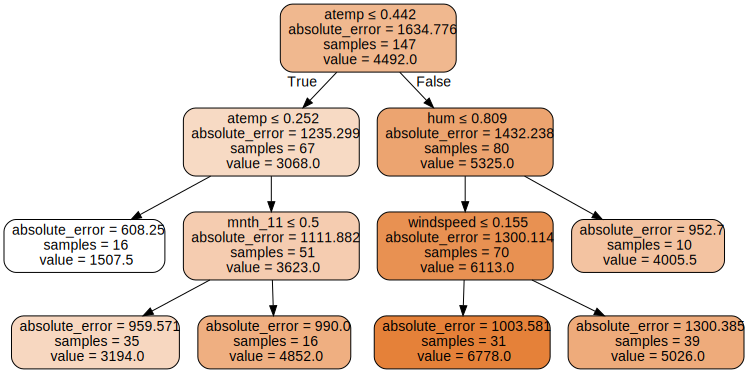

In [194]:
# обучим и визуализируем полученное дерево
graph = get_graphviz_graph(camera_regressor)
graph

In [195]:
# посчитаем ошибку на тестовой части выборки
predictions = camera_regressor.predict(X_test)
err = mean_absolute_percentage_error(y_test, predictions) * 100
print(f"Ошибка на тестовых данных = {err:0.3f}%")

Ошибка на тестовых данных = 34.996%


Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

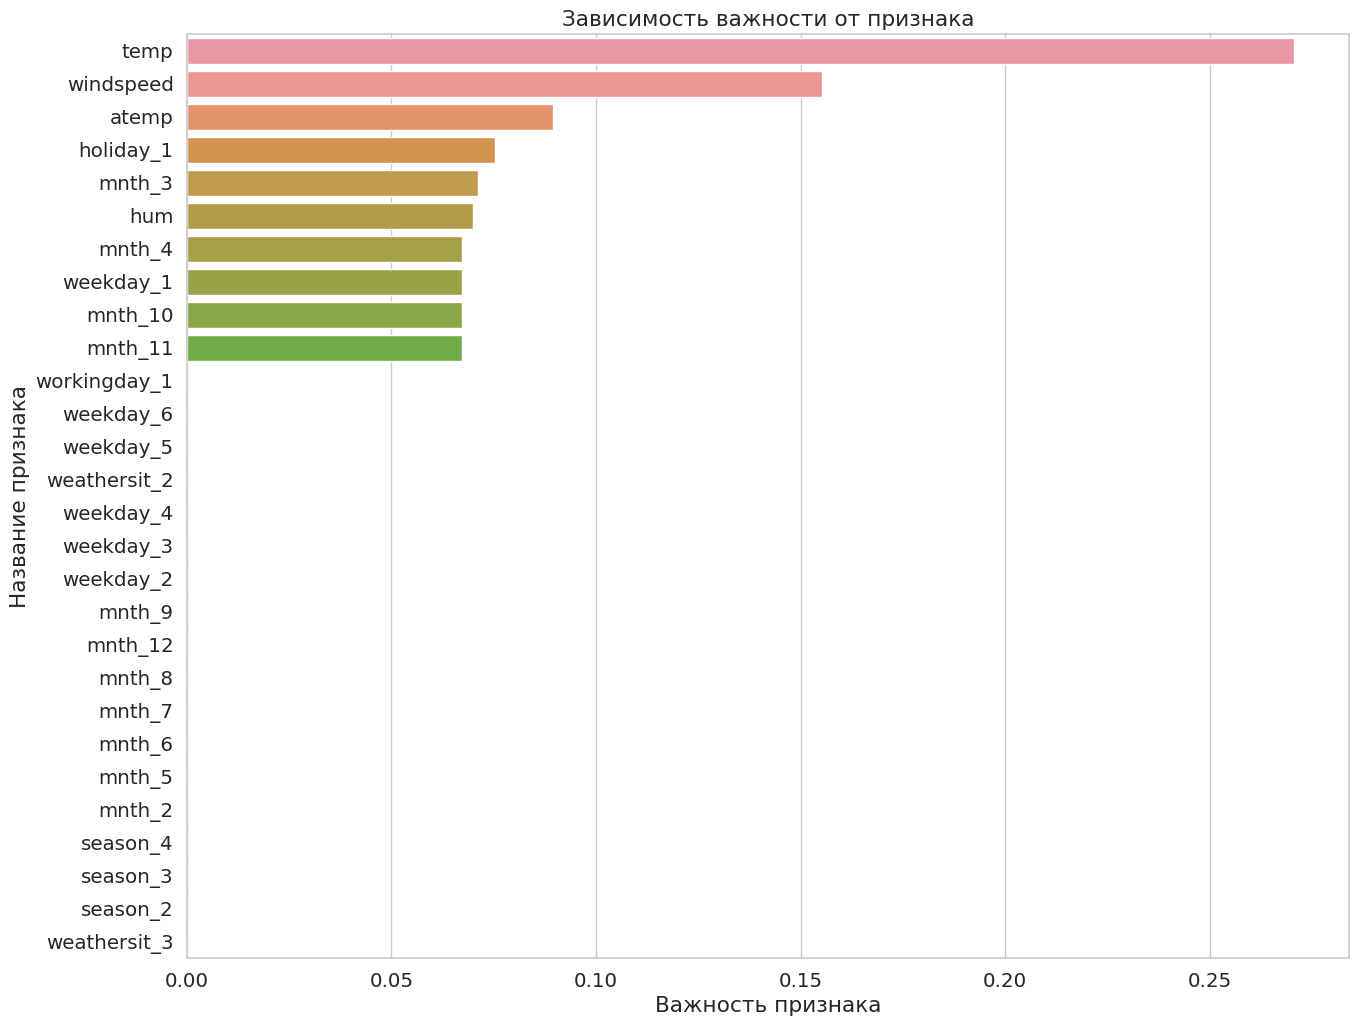

In [196]:
importances = tree.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Визуализация значений важности признаков
plt.figure(figsize=(15, 12))
ax = sns.barplot(x='importance', y='feature', data=feature_importances)
ax.set_xlabel('Важность признака')
ax.set_ylabel('Название признака')
plt.title('Зависимость важности от признака')
plt.show()

Сделайте выводы.

Точность предсказаний решающего дерева может возрастать при увеличении глубины дерева, поскольку дерево получает больше возможностей для разделения данных на более мелкие группы. Однако, увеличение глубины дерева может привести к переобучению модели на обучающих данных, что может снизить точность предсказаний на новых данных. 

При подборе минимального количества объектов в листе могут возникнуть следующие проблемы: при маленьком количестве объектов дерево может переобучиться, что приведет к низкой точности на новых данных; при большом количестве объектов дерево может потерять чувствительность к существенным признакам. Поэтому при подборе минимального количества объектов в листе необходимо соблюдать баланс между переобучением и недообучением.

Признаками, внесшими наибольший вклад в количество арендованных велосипедов, являются: фактическая температура воздуха( > 0.25), скорость ветра( > 0.15), ощущаемая температура (в предыдущем задании было отмечено, что она линейно зависит от температуры), является ли текущий день выходным а также месяц март (ведь с наступлением весны люди чаще начинают пользоваться велосипедами)!

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [197]:
n_estimators = 500
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

In [198]:
# Получение предсказаний на тренировочных и валидационных данных
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_valid)

# Вычисление ошибки на тренировочных и тестовых данных
train_error = mean_absolute_percentage_error(y_train, train_predictions)
test_error = mean_absolute_percentage_error(y_valid, test_predictions)

In [199]:
# Построение графика зависимости ошибки от количества деревьев
train_predictions = []
valid_predictions = []
for tree in model.estimators_:
    train_predictions.append(tree.predict(X_train))
    valid_predictions.append(tree.predict(X_valid))
train_predictions = np.array(train_predictions)
valid_predictions = np.array(valid_predictions)
train_mean = np.mean(train_predictions, axis=0)
valid_mean = np.mean(valid_predictions, axis=0)
train_mape = mean_absolute_percentage_error(y_train, train_mean)
valid_mape = mean_absolute_percentage_error(y_valid, valid_mean)

# Вывод результатов
print(f"MAPE на обучающей выборке: {train_mape:.2f}%")
print(f"MAPE на валидационной выборке: {valid_mape:.2f}%")

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature nam

MAPE на обучающей выборке: 0.25%
MAPE на валидационной выборке: 0.30%


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature nam

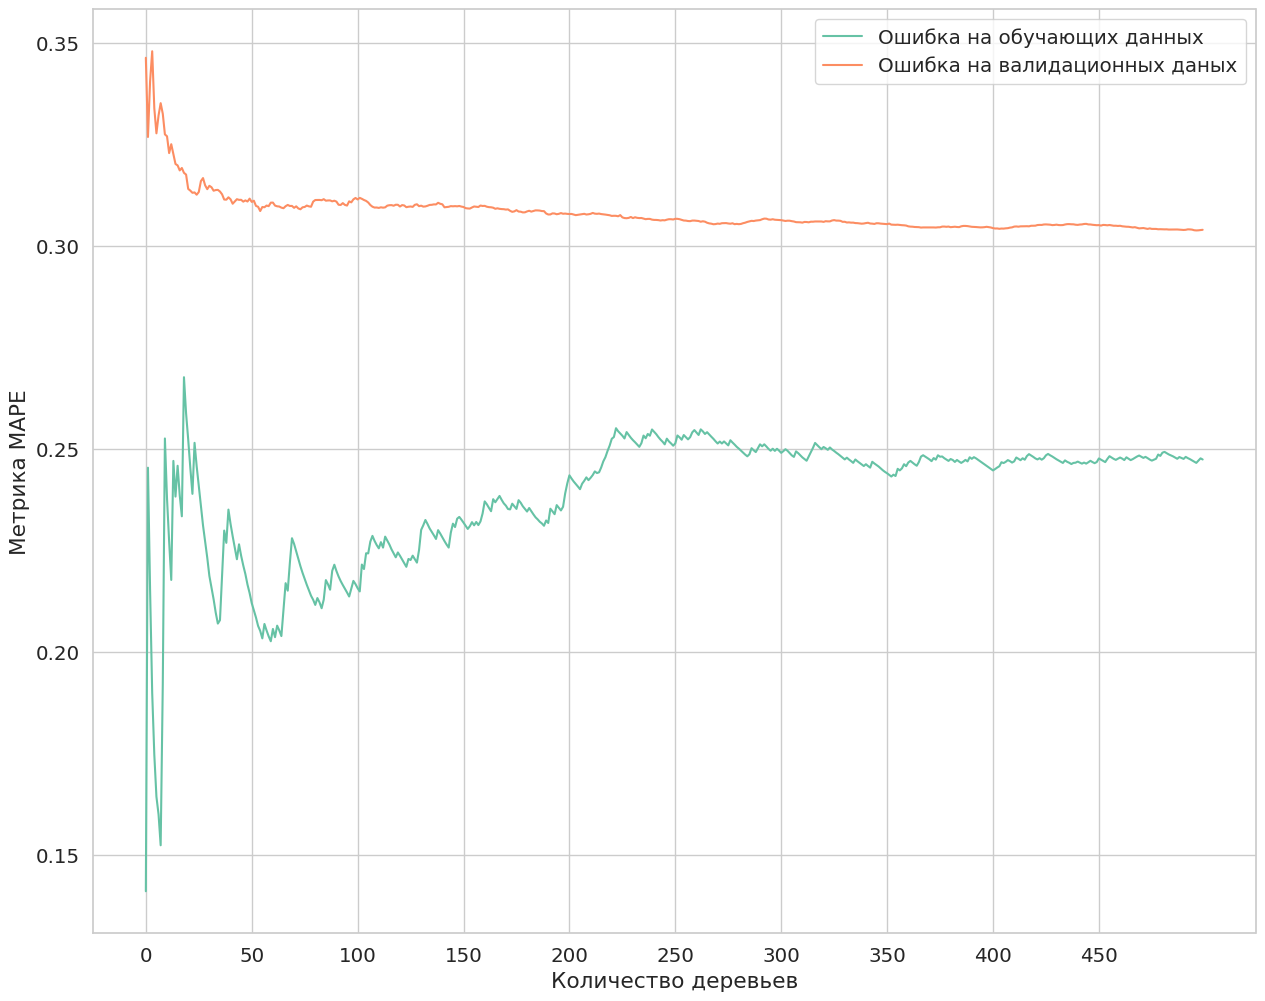

In [200]:
# График зависимости ошибки от количества деревьев
train_errors = []
valid_errors = []
for i, tree in enumerate(model.estimators_, start=1):
    train_prediction = np.mean(train_predictions[:i], axis=0)
    valid_prediction = np.mean(valid_predictions[:i], axis=0)
    train_error = mean_absolute_percentage_error(y_train, train_prediction)
    valid_error = mean_absolute_percentage_error(y_valid, valid_prediction)
    train_errors.append(train_error)
    valid_errors.append(valid_error)
plt.figure(figsize=(15, 12))
plt.plot(train_errors, label='Ошибка на обучающих данных')
plt.plot(valid_errors, label='Ошибка на валидационных даных')
plt.legend()
plt.xlabel('Количество деревьев')
plt.ylabel('Метрика MAPE')
plt.xticks(range(0, n_estimators, 50), [str(i) for i in range(0, n_estimators, 50)])
plt.show()

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

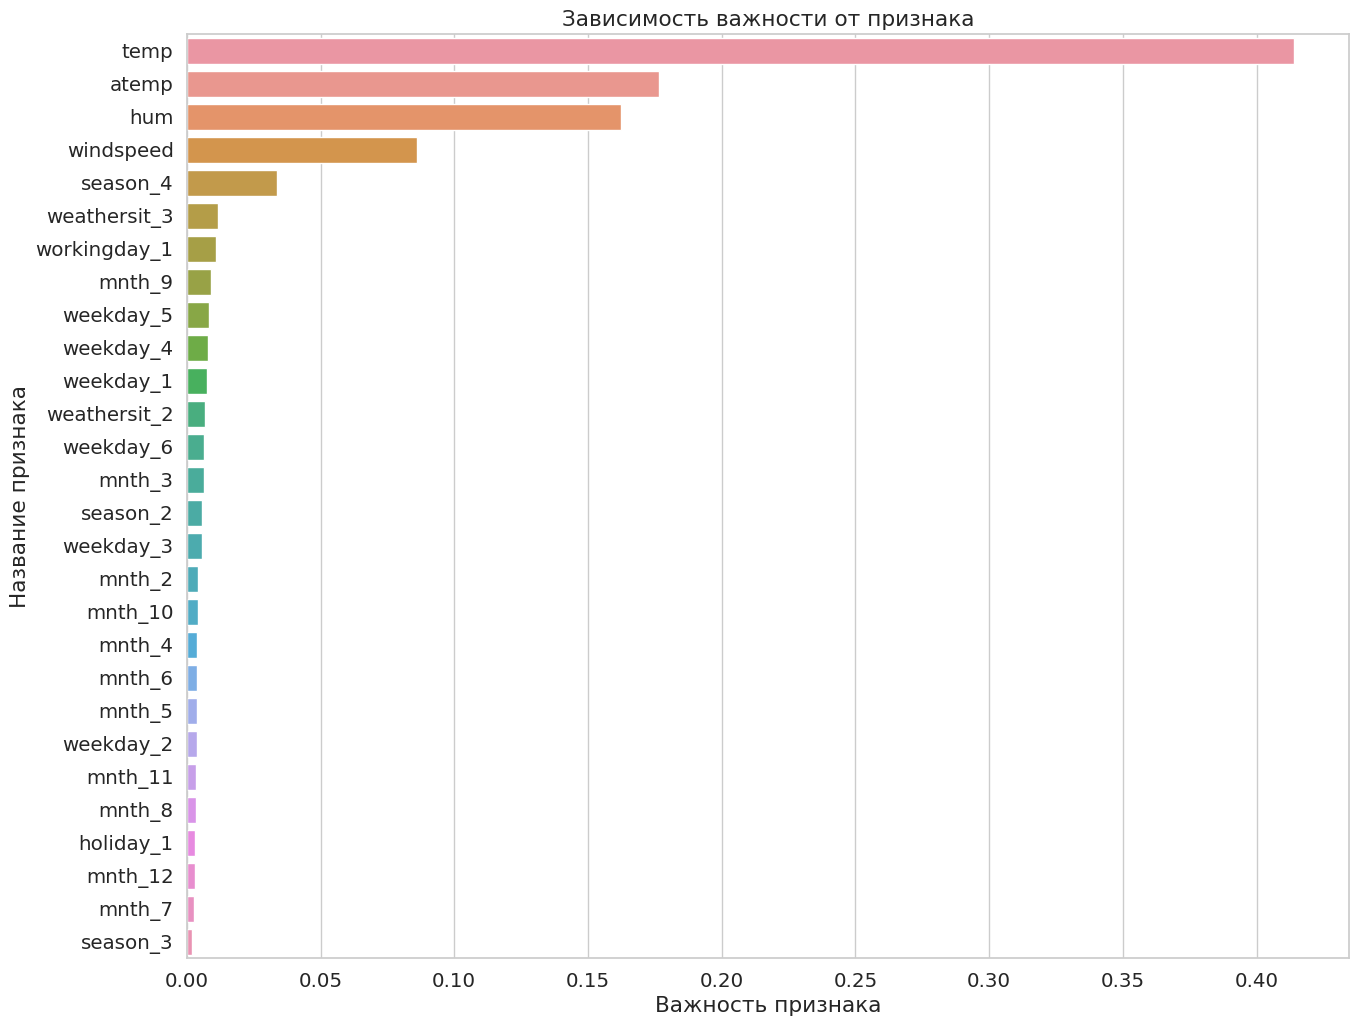

In [205]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Визуализация значений важности признаков
plt.figure(figsize=(15, 12))
ax = sns.barplot(x='importance', y='feature', data=feature_importances)
ax.set_xlabel('Важность признака')
ax.set_ylabel('Название признака')
plt.title('Зависимость важности от признака')
plt.show()

Сделайте выводы.

Решающий лес показывает гораздо меньшую ошибку, чем решающее дерево при оптимальных параметрах. Это связано с устройством решающего леса: он является ансамблем решающих деревьев, каждое из которых обучено на случайной подвыборке признаков. Этот подход может привести к лучшей обобщающей способности и уменьшить переобучение. 

Как и ожидалось, точность предсказаний решающего леса на тестовых данных оказалась ниже, чем на тренировочных.

Вдобавок, по сравению с 1 решающим деревом с оптимальными параметрами изменилась важность признаков: фактическая и ощутимая температура все еще доминируют, однако влажность и 4 сезон (осень) увеличили свою важность, в отличие от признака, отвечающего за то, является ли текущий день выходным и признака, отвечающего за наступление марта.